#### Importing required libraries

In [54]:
import json

In [ ]:
with open('Laptop_Review_Train.json') as f:
    train_data = json.load(f)

In [23]:
with open('Laptop_Review_Val.json') as f:
    val_data = json.load(f)

In [24]:
with open('Laptop_Review_Test.json') as f:
    test_data = json.load(f)

#### BIO Encoding of data

In [55]:
def bio_label_encoding(tokens, aspects):
    labels = ['O'] * len(tokens)
    for aspect in aspects: 
        start = aspect['from']
        end = aspect['to']
        labels[start] = 'B'
        for i in range(start+1, end):
            labels[i] = 'I'
    return labels

#### Iterating over each sentence and encoding it 

In [56]:
def convert_to_bio(data):
    processed_data = {}
    for i in range(len(data)):
        words = data[i]['words']
        text = data[i]['raw_words']
        aspects = data[i]['aspects']
        labels = bio_label_encoding(words, aspects)
        processed_data[i] = {
            'text': text,
            'labels': labels
        }
    return processed_data

In [27]:
processed_train_data = convert_to_bio(train_data)
processed_val_data = convert_to_bio(val_data)
processed_test_data = convert_to_bio(test_data)

In [28]:
# dumping the processed data
with open('Laptop_Review_Train_Processed.json', 'w') as f:
    json.dump(processed_train_data, f, indent=4)
with open('Laptop_Review_Val_Processed.json', 'w') as f:
    json.dump(processed_val_data, f, indent=4)
with open('Laptop_Review_Test_Processed.json', 'w') as f:
    json.dump(processed_test_data, f, indent=4) 

In [58]:
with open('Laptop_Review_Train_Processed.json') as f:
    train_data = json.load(f)
with open('Laptop_Review_Val_Processed.json') as f:
    val_data = json.load(f)
with open('Laptop_Review_Test_Processed.json') as f:
    test_data = json.load(f)

In [59]:
keys = list(train_data.keys())
for key in keys:
    print(train_data[key])
    break

{'text': 'I charge it at night and skip taking the cord with me because of the good battery life .', 'labels': ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B', 'I', 'O']}


In [60]:
from torchtext.transforms import BERTTokenizer

In [61]:
tokenizer = BERTTokenizer(vocab_path='https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt', do_lower_case=True, return_tokens=True)
tokenizer('hello world')

100%|██████████| 232k/232k [00:00<00:00, 538kB/s] 


['hello', 'world']

In [62]:
tokenized = tokenizer(train_data['0']['text'].split(' '))
print(tokenized)
print(len(tokenized))

[['i'], ['charge'], ['it'], ['at'], ['night'], ['and'], ['skip'], ['taking'], ['the'], ['cord'], ['with'], ['me'], ['because'], ['of'], ['the'], ['good'], ['battery'], ['life'], ['.']]
19


In [63]:
import torchtext

In [64]:
from torchtext.vocab import GloVe, FastText

In [65]:
from torchtext.data import get_tokenizer

tokenizer = get_tokenizer("basic_english") ## We'll use tokenizer available from PyTorch

tokenizer("Hello, How are you?")


['hello', ',', 'how', 'are', 'you', '?']

In [66]:
from torchtext.vocab import GloVe

glove = GloVe(name='6B', dim=100)

In [67]:
global_vectors = GloVe(name='6B', dim=100)

embeddings = global_vectors.get_vecs_by_tokens(train_data['5']['text'].split(' '), lower_case_backup=True)

embeddings.shape

torch.Size([22, 100])

In [68]:
print(train_data['5']['text'].split(' '))
print(len(train_data['5']['text'].split(' ')))
print(embeddings.shape)
print(train_data['5']['labels'])
print(len(train_data['5']['labels']))

['However', ',', 'the', 'multi-touch', 'gestures', 'and', 'large', 'tracking', 'area', 'make', 'having', 'an', 'external', 'mouse', 'unnecessary', '(', 'unless', 'you', "'re", 'gaming', ')', '.']
22
torch.Size([22, 100])
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B', 'I', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
22


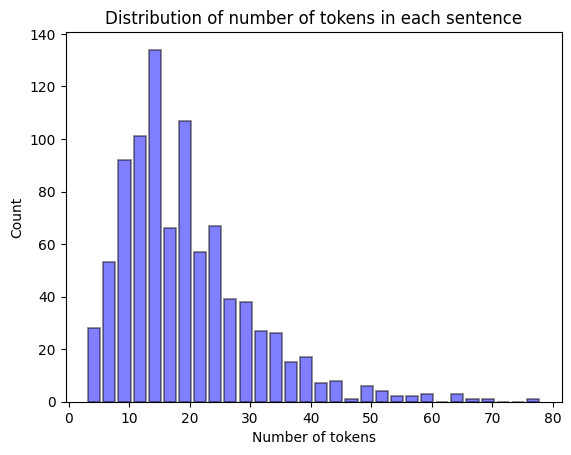

In [73]:
# plot data distribution of number of tokens in each sentence
import matplotlib.pyplot as plt
label_counts = []
for key in train_data.keys():
    label_counts.append(len(train_data[key]['labels']))
plt.hist(label_counts, bins=30, alpha=0.5, color='b', edgecolor='black', linewidth=1.2, histtype='bar', align='mid', orientation='vertical', rwidth=0.8, label='Number of tokens')
plt.title('Distribution of number of tokens in each sentence')
plt.xlabel('Number of tokens')
plt.ylabel('Count')
plt.show()